In [3]:
# libraries needed
from scipy.integrate import odeint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
df = pd.read_excel('D:\All\Courses\Case studies for social good\mobility.xlsx')
dfn = df[df['country']=='South Africa']
dfn.head()

,country,iso3c,date,confirmed,deaths,recovered,soc_dist,mov_rest,pub_health,soc_econ,...,gtrends_country_score,region,income,population,land_area_skm,pop_density,pop_largest_city,life_expectancy,gdp_capita,timestamp
15036,South Africa,ZAF,2020-01-22,0,0,0,0.0,0.0,0.0,0.0,...,48.0,Sub-Saharan Africa,Upper middle income,57779622.0,1213090.0,47.63012,5485986.0,63.857,7433.615398,2020-04-15 15:26:02.171
15037,South Africa,ZAF,2020-01-23,0,0,0,0.0,0.0,0.0,0.0,...,48.0,Sub-Saharan Africa,Upper middle income,57779622.0,1213090.0,47.63012,5485986.0,63.857,7433.615398,2020-04-15 15:26:02.171
15038,South Africa,ZAF,2020-01-24,0,0,0,0.0,0.0,0.0,0.0,...,48.0,Sub-Saharan Africa,Upper middle income,57779622.0,1213090.0,47.63012,5485986.0,63.857,7433.615398,2020-04-15 15:26:02.171
15039,South Africa,ZAF,2020-01-25,0,0,0,0.0,0.0,0.0,0.0,...,48.0,Sub-Saharan Africa,Upper middle income,57779622.0,1213090.0,47.63012,5485986.0,63.857,7433.615398,2020-04-15 15:26:02.171
15040,South Africa,ZAF,2020-01-26,0,0,0,0.0,0.0,0.0,0.0,...,48.0,Sub-Saharan Africa,Upper middle income,57779622.0,1213090.0,47.63012,5485986.0,63.857,7433.615398,2020-04-15 15:26:02.171


In [9]:
def deriv(y, t, N, mu, alpha, beta, gamma, delta):
    S, E, I, R = y
    dSdt = mu - delta * S - beta * S * I / N
    dEdt = beta * S * I / N - delta * E - alpha * E # gamma * I
    dIdt = alpha * E - delta * I - gamma * I
    dRdt = gamma * I - delta * R
    return dSdt, dEdt, dIdt, dRdt

In [38]:
N = 108000000.0
delta = 1 / (66.71 * 365)
mu = delta * N
alpha = 0.1243
beta = 0.5  #0.05  # infected person infects 1 other person per day
#D = 14.0 # infections lasts four days
gamma = 0.09871
#delta = 1.0 / 3.0  # incubation period of three days

S0, E0, I0, R0 = 107999999, 1, 0, 0  # initial conditions: one infected, rest susceptible

In [39]:
#N = 108000000.0
#beta = .30  # infected person infects 1 other person per day
#D = 14.0 # infections lasts four days
#gamma = 1.0 / D
#delta = 1.0 / 3.0  # incubation period of three days

#S0, I0, R0 = 107999999, 1, 0  # initial conditions: one infected, rest susceptible

In [40]:
t = np.linspace(0, 200, 200) # Grid of time points (in days)
y0 = S0, E0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, mu, alpha, beta, gamma, delta))
S, E, I, R = ret.T

In [41]:
df = pd.DataFrame({'S':S, 'E':E, 'I':I, 'R':R})
df

,S,E,I,R
0,1.080000e+08,1.000000,0.000000e+00,0.000000e+00
1,1.080000e+08,0.910614,1.128514e-01,5.782114e-03
2,1.080000e+08,0.880446,2.081500e-01,2.181324e-02
3,1.080000e+08,0.896235,2.937397e-01,4.676079e-02
4,1.080000e+08,0.949466,3.754493e-01,7.996391e-02
...,...,...,...,...
195,8.895039e+05,245031.658059,1.672712e+06,1.051928e+08
196,8.872836e+05,222484.747681,1.542428e+06,1.053478e+08
197,8.855951e+05,202087.235520,1.421903e+06,1.054904e+08
198,8.843939e+05,183628.199426,1.310459e+06,1.056215e+08


In [43]:
def ode_sa():
    import matplotlib.pyplot as plt
    import cufflinks as cf
    from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
    init_notebook_mode(connected=True)  
    cf.go_offline()
    %matplotlib notebook
    #for case in df.columns:
    df.iplot(xTitle='$Time \; since \; the \; 1^{st} \; case$', yTitle='$proportion \; of \; At \; risk \; population$')#label='susceptible')
    #df['I'].iplot()#label='Infected')
    #df['R'].iplot()#label='Recovered')
    #plt.legend()
ode_sa()

In [44]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## Selecting only Ethiopian cases 
etc = df_confirmed[df_confirmed['Country/Region'] == 'Ethiopia'] # confirmed cases 
Confirmed = etc.iloc[:,-1].tolist()  # Converting dataframe into 

In [96]:
etc=df_confirmed[df_confirmed['Country/Region']=='Ethiopia']
Confirmed = etc.iloc[:,-1].tolist()

etd=df_deaths[df_deaths['Country/Region']=='Ethiopia']
Death = etd.iloc[:,-1].tolist()

etr=df_recovered[df_recovered['Country/Region']=='Ethiopia']
Recovered = etr.iloc[:,-1].tolist()

nem=['Confirmed','Death','Recovered']
df=pd.DataFrame([Confirmed,Death,Recovered], index=nem)

df.reset_index(level=0, inplace=True)

df.columns=['Case','Freq']

#plt.bar(df['Case'],df['Freq'])
case_nums_eth = df_confirmed[df_confirmed['Country/Region']=='Ethiopia'] #.sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
case_nums_ethD = df_deaths[df_deaths['Country/Region']=='Ethiopia']
case_nums_ethR = df_recovered[df_recovered['Country/Region']=='Ethiopia']
cne=case_nums_eth.iloc[:,55:].transpose()
cneD=case_nums_ethD.iloc[:,55:].transpose()
cneR=case_nums_ethR.iloc[:,55:].transpose()
cne = cne.rename(columns={104:'cases'})
cneD = cneD.rename(columns={104:'death'})
cneR = cneR.rename(columns={96:'recovered'})
cne = cne['cases'] - cneD['death'] -cneR['recovered']
l = cne.tolist()
#cd = pd.DataFrame({"cases":cases,"death":death, "recovered":recovered})
#cne = cne['cases'].tolist()
#cneD = cneD['death'].tolist()
#cneR = cneR['recovered'].tolist()
#l = list(set(cne) - set(cneD) - set(cneR)) 
#cne = cne.rename(columns={104:'cases'})
#l=cne['cases'].tolist()
l
#cneR # active cases

[1,
 1,
 1,
 5,
 5,
 6,
 6,
 9,
 9,
 7,
 7,
 12,
 12,
 12,
 16,
 15,
 20,
 19,
 24,
 27,
 26,
 32,
 34,
 37,
 38,
 46,
 49,
 50,
 58,
 56,
 58,
 57,
 65,
 67,
 74,
 78,
 86,
 89,
 92,
 95,
 92,
 92,
 89,
 90,
 79]

parameter values are  [14.02441116 13.91499508] 1


<IPython.core.display.Javascript object>


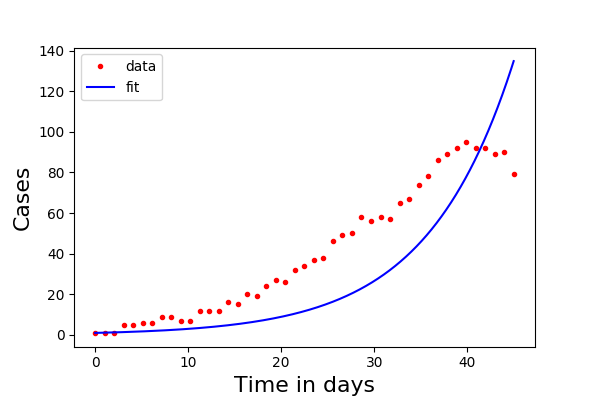

In [97]:
import pylab as pp
import numpy as np
from scipy import integrate, optimize

N = 108000000
#dSdt = -beta * S * I / N
    #dIdt = beta * S * I / N - gamma * I
    ##dIdt = delta * E - gamma * I
    #dRdt = gamma * I
class Parameterize_ODE():
    def __init__(self):
        self.X = np.linspace(0,45,45)
        self.y = np.array(l)
        self.y0 = [107999999,1,0] # inital conditions ODEs
    def ode(self, y, X, p):
        return (-p[0]*y[0]*y[1]/N,
                 p[0]*y[0]*y[1]/N - p[1]*y[1],
                            p[1]*y[1])
    def model(self, X, p):
        return integrate.odeint(self.ode, self.y0, X, args=(p,))
    def f_resid(self, p):
        return self.y - self.model(self.X, p)[:,1]
    def optim(self, p_quess):
        return optimize.leastsq(self.f_resid, p_guess) # fit params

po = Parameterize_ODE(); p_guess = [0.2, 0.3] 
c, kvg = po.optim(p_guess)

    # --- show ---
print ("parameter values are ", c, kvg)
x = np.linspace(min(po.X), max(po.X), 2000)
fg=pp.plot(po.X, po.y,'.r',x, po.model(x, c)[:,1],'-b')
pp.xlabel('Time in days',{"fontsize":16}); pp.ylabel("Cases",{"fontsize":16}); pp.legend(('data','fit'),loc=0); #pp.show()

In [23]:
sa =etc.iloc[:,47:].transpose()
sa[200].plot()

In [24]:
sa.to_excel('sa.xlsx', sheet_name='sheet1')